In [49]:
import xarray as xr
import numpy as np
import pandas as pd

In [50]:
import matplotlib.pyplot as plt

import FaIR data

In [51]:
ds_fair=xr.open_dataset('SCM_data/timeseries/flat10_FaIR.nc')

import MAGICC data

In [52]:
ds_magicc=xr.open_dataset('SCM_data/timeseries/flat10_magicc.nc')

In [53]:
ds_cicero=xr.open_dataset('SCM_data/timeseries/flat10_CICEROSCM.nc')

In [54]:
def plot_range(SampleData,ax1,col='steelblue'):
 prctl=[5,25,50,75,95]
 SDist=np.percentile(SampleData,prctl,axis=1).T

 x=np.arange(0,len(pd.DatetimeIndex(SampleData.time).year))
 #ax1.plot(x, SDist[:,2],)
 for i in range(3):
     alph=0.15+(i/len(prctl))
     ax1.fill_between(x,SDist[:,0+i], SDist[:,4-i], color=col, alpha=alph)
 return SDist

In [55]:
ds_cicero.scenario

<xarray.DataArray 'scenario' (scenario: 4)>
array(['flat10', 'flat10_zec', 'flat10_cdr', 'esm-piControl'], dtype=object)
Coordinates:
  * scenario  (scenario) object 'flat10' 'flat10_zec' ... 'esm-piControl'

In [56]:
ds_fair.keys()

KeysView(<xarray.Dataset>
Dimensions:            (config: 1001, time: 321, scenario: 3)
Coordinates:
  * config             (config) int32 1230 1715 2658 ... 1497041 1497105 1498424
  * time               (time) int32 0 1 2 3 4 5 6 ... 315 316 317 318 319 320
  * scenario           (scenario) object 'esm-flat10' ... 'esm-flat10_cdr'
Data variables:
    ecs                (config) float64 ...
    tcr                (config) float64 ...
    tcre               (config) float64 ...
    zec50              (config) float64 ...
    zec100             (config) float64 ...
    zec200             (config) float64 ...
    tr1000             (config) float64 ...
    tr0                (config) float64 ...
    tpw                (config) int32 ...
    temperature        (time, scenario, config) float64 ...
    co2_concentration  (time, scenario, config) float64 ...
    airborne_fraction  (time, scenario, config) float64 ...)

In [57]:
ds_magicc.keys()

KeysView(<xarray.Dataset>
Dimensions:                          (time: 316, scenario: 3, ensemble_member: 600)
Coordinates:
  * time                             (time) datetime64[ns] 1850-01-01 ... 216...
  * scenario                         (scenario) object 'flat10' ... 'flat10_zec'
  * ensemble_member                  (ensemble_member) object '0' '1' ... '99'
Data variables:
    Atmospheric_Concentrations__CO2  (scenario, ensemble_member, time) float64 ...
    Surface_Air_Temperature_Change   (scenario, ensemble_member, time) float64 ...
Attributes:
    scmdata_metadata_climate_model:  MAGICCv7.5.3
    scmdata_metadata_region:         World
    scmdata_metadata_model:          idealised
    created_at:                      2023-10-24T13:45:25.348212
    _scmdata_version:                0.16.1)

In [58]:
ds_magicc=ds_magicc.rename_vars(name_dict={'Atmospheric_Concentrations__CO2':'co2_concentration'})
ds_magicc=ds_magicc.rename_vars(name_dict={'Surface_Air_Temperature_Change':'temperature'})
ds_magicc=ds_magicc.rename_dims(dims_dict={'ensemble_member':'config'})


In [59]:
ds_fair.scenario

<xarray.DataArray 'scenario' (scenario: 3)>
array(['esm-flat10', 'esm-flat10_zec', 'esm-flat10_cdr'], dtype=object)
Coordinates:
  * scenario  (scenario) object 'esm-flat10' 'esm-flat10_zec' 'esm-flat10_cdr'

In [60]:
ds_magicc["scenario"]=("scenario",['esm-flat10','esm-flat10_cdr','esm-flat10_zec'])

In [61]:
ds_cicero["scenario"]=("scenario",['esm-flat10','esm-flat10_zec','esm-flat10_cdr','esm-piControl'])

(0.0, 320.0)

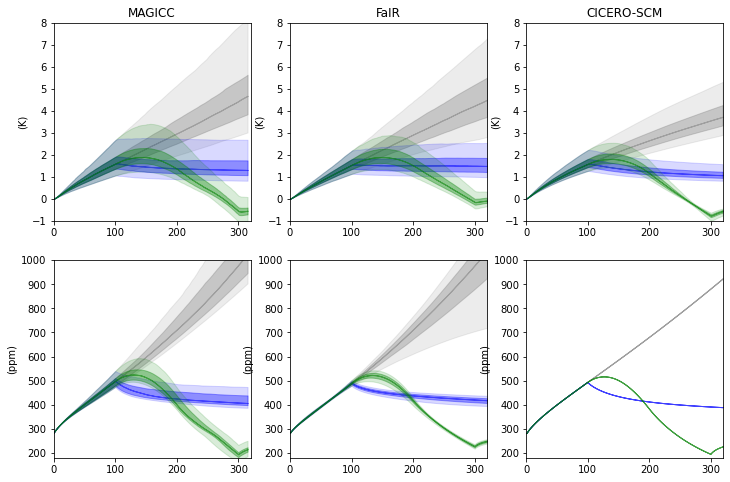

In [62]:
fig = plt.figure(figsize=[12,8])

ax1 = fig.add_subplot(2,3,1)

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10').T,ax1,col='grey')
plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_zec').T,ax1,col='blue')
plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').T,ax1,col='green')
ax1.set_title('MAGICC')
ax1.set_ylabel('(K)')
ax1.set_ylim([-1,8])
ax1.set_xlim([0,320])


ax2 = fig.add_subplot(2,3,2)

plot_range(ds_fair.temperature.sel(scenario='esm-flat10'),ax2,col='grey')
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_zec'),ax2,col='blue')
plot_range(ds_fair.temperature.sel(scenario='esm-flat10_cdr'),ax2,col='green')
ax2.set_title('FaIR')
ax2.set_ylabel('(K)')
ax2.set_ylim([-1,8])
ax2.set_xlim([0,320])

ax3 = fig.add_subplot(2,3,3)

plot_range(ds_cicero.temperature.sel(scenario='esm-flat10'),ax3,col='grey')
plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_zec'),ax3,col='blue')
plot_range(ds_cicero.temperature.sel(scenario='esm-flat10_cdr'),ax3,col='green')
ax3.set_title('CICERO-SCM')
ax3.set_ylabel('(K)')
ax3.set_ylim([-1,8])
ax3.set_xlim([0,320])

ax4 = fig.add_subplot(2,3,4)

plot_range(ds_magicc.co2_concentration.sel(scenario='esm-flat10').T,ax4,col='grey')
plot_range(ds_magicc.co2_concentration.sel(scenario='esm-flat10_zec').T,ax4,col='blue')
plot_range(ds_magicc.co2_concentration.sel(scenario='esm-flat10_cdr').T,ax4,col='green')
ax4.set_ylabel('(ppm)')
ax4.set_ylim([180,1000])
ax4.set_xlim([0,320])

ax5= fig.add_subplot(2,3,5)

plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10'),ax5,col='grey')
plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10_zec'),ax5,col='blue')
plot_range(ds_fair.co2_concentration.sel(scenario='esm-flat10_cdr'),ax5,col='green')
ax5.set_ylabel('(ppm)')
ax5.set_ylim([180,1000])
ax5.set_xlim([0,320])

ax6 = fig.add_subplot(2,3,6)

plot_range(ds_cicero.co2_concentration.sel(scenario='esm-flat10'),ax6,col='grey')
plot_range(ds_cicero.co2_concentration.sel(scenario='esm-flat10_zec'),ax6,col='blue')
plot_range(ds_cicero.co2_concentration.sel(scenario='esm-flat10_cdr'),ax6,col='green')
ax6.set_ylabel('(ppm)')
ax6.set_ylim([180,1000])
ax6.set_xlim([0,320])




In [63]:
e_flat10=pd.read_csv('flat10.csv',header=4)
e_flat10_cdr=pd.read_csv('flat10_cdr.csv',header=4)
e_flat10_zec=pd.read_csv('flat10_zec.csv',header=4)


In [64]:
def extd(ts,leng):
    out=np.zeros(leng)
    if leng>len(ts):
        out[:len(ts)]=ts.values
        out[len(ts):]=ts.iloc[-1]
    else:
        out=ts[:leng]
    return out

In [65]:
e_flat10['Emission Rate (PgC a-1)']

0      10.0
1      10.0
2      10.0
3      10.0
4      10.0
       ... 
145    10.0
146    10.0
147    10.0
148    10.0
149    10.0
Name: Emission Rate (PgC a-1), Length: 150, dtype: float64

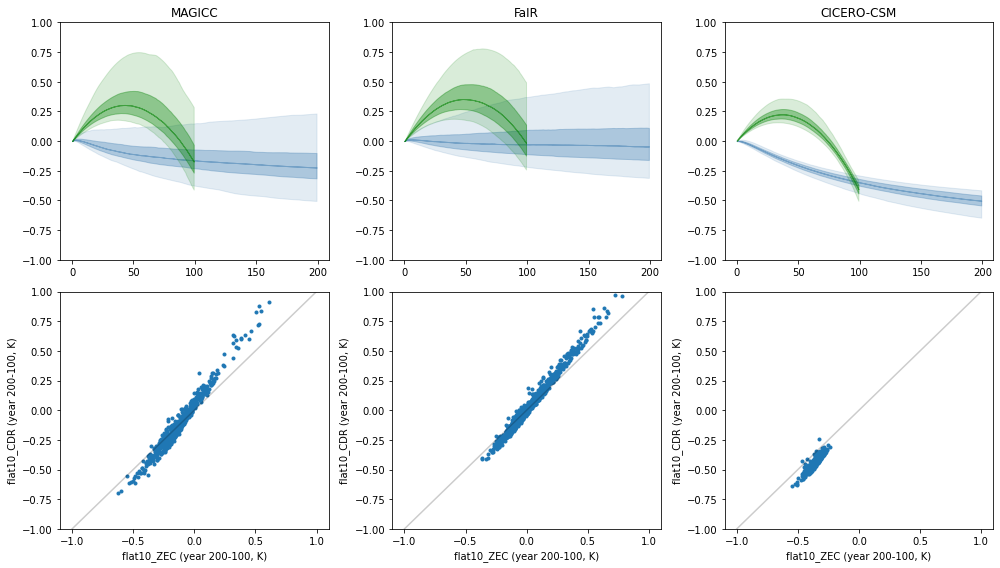

In [66]:
fig = plt.figure(figsize=[14,8])

m_100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100).T
m_100pl=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300)).T
m_100plc=ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200)).T

ax1 = fig.add_subplot(2,3,1)
ax1.set_ylim([-1,1])
ax1.set_title('MAGICC')
plot_range(m_100pl-m_100,ax1)
plot_range(m_100plc-m_100,ax1,'g')

t_100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
t_100pl=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
t_100plc=ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,3,2)
ax2.set_ylim([-1,1])
ax2.set_title('FaIR')

plot_range(t_100pl-t_100,ax2)
plot_range(t_100plc-t_100,ax2,'g')

c_100=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
c_100pl=ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=slice(100,300))
c_100plc=ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,200))

ax2 = fig.add_subplot(2,3,3)
ax2.set_ylim([-1,1])
ax2.set_title('CICERO-CSM')

plot_range(c_100pl-c_100,ax2)
plot_range(c_100plc-c_100,ax2,'g')

ax3 = fig.add_subplot(2,3,4)

ax3.plot(ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-m_100,ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-m_100,'.')
ax3.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax3.set_xlabel('flat10_ZEC (year 200-100, K)')
ax3.set_ylabel('flat10_CDR (year 200-100, K)')
ax3.set_ylim([-1,1])

ax4 = fig.add_subplot(2,3,5)

ax4.plot(ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-t_100,ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-t_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])

ax4 = fig.add_subplot(2,3,6)

ax4.plot(ds_cicero.temperature.sel(scenario='esm-flat10_zec').isel(time=200).T-c_100,ds_cicero.temperature.sel(scenario='esm-flat10_cdr').isel(time=200).T-c_100,'.')
ax4.plot([-1,1],[-1,1],'k-',alpha=0.2)
ax4.set_xlabel('flat10_ZEC (year 200-100, K)')
ax4.set_ylabel('flat10_CDR (year 200-100, K)')
ax4.set_ylim([-1,1])
plt.tight_layout()

In [67]:
fair_metrics=pd.read_csv('SCM_data/metrics/FaIR_metrics.csv',index_col=0)
magicc_metrics=pd.read_csv('SCM_data/metrics/MAGICC_metrics.csv',index_col=0)


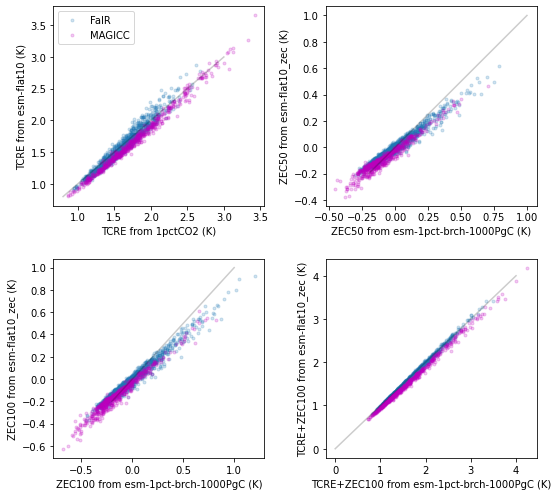

In [68]:
fig = plt.figure(figsize=[8,7])

t_100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
m_100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

ax1 = fig.add_subplot(2,2,1)

p1=ax1.plot(fair_metrics['tcre'],t_100,'.',alpha=0.2)
p2=ax1.plot(magicc_metrics['tcre_1pctco2'],m_100,'.',color='m',alpha=0.2)

ax1.plot([0.8,3],[.8,3],'k-',alpha=0.2)
ax1.set_ylabel('TCRE from esm-flat10 (K)')
ax1.set_xlabel('TCRE from 1pctCO2 (K)')

ax1.legend([p1[0],p2[0]],['FaIR','MAGICC'])

ax2 = fig.add_subplot(2,2,2)

z50=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
m50=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=150)-ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)

ax2.plot(fair_metrics['zec50'],ds_fair.zec50,'.',alpha=0.2)
ax2.plot(magicc_metrics['zec50_esm-1pct-brch-1000pgc'],m50,'.',color='m',alpha=0.2)

ax2.plot([-.2,1],[-.2,1],'k-',alpha=0.2)
ax2.set_ylabel('ZEC50 from esm-flat10_zec (K)')
ax2.set_xlabel('ZEC50 from esm-1pct-brch-1000PgC (K)')

ax3 = fig.add_subplot(2,2,3)
z100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
m100=ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_magicc.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
ax3.plot(fair_metrics['zec100'],ds_fair.zec100,'.',alpha=0.2)

ax3.plot(magicc_metrics['zec100_esm-1pct-brch-1000pgc'],m100,'.',color='m',alpha=0.2)
ax3.plot([-.2,1],[-.2,1],'k-',alpha=0.2)
ax3.set_ylabel('ZEC100 from esm-flat10_zec (K)')
ax3.set_xlabel('ZEC100 from esm-1pct-brch-1000PgC (K)')

ax4 = fig.add_subplot(2,2,4)
z100=ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=200)-ds_fair.temperature.sel(scenario='esm-flat10_zec').isel(time=100)
ax4.plot(fair_metrics['zec100']+fair_metrics['tcre'],ds_fair.zec100+ds_fair.tcre,'.',alpha=0.2)
ax4.plot(magicc_metrics['zec100_esm-1pct-brch-1000pgc']+magicc_metrics['tcre_1pctco2'],m100+m_100,'.',color='m',alpha=0.2)

ax4.plot([0,4],[0,4],'k-',alpha=0.2)
ax4.set_ylabel('TCRE+ZEC100 from esm-flat10_zec (K)')
ax4.set_xlabel('TCRE+ZEC100 from esm-1pct-brch-1000PgC (K)')

plt.tight_layout()


In [69]:
ds_fair.co2_concentration.sel(scenario='esm-flat10')[0,0]

<xarray.DataArray 'co2_concentration' ()>
array(284.316999)
Coordinates:
    config    int32 1230
    time      int32 0
    scenario  <U10 'esm-flat10'

In [70]:
max_co2 = ds_fair.time.where(ds_fair.co2_concentration > 284.3*2).min(dim="time")
tcr_flat10_fair=ds_fair.sel(time=max_co2.fillna(0).astype(int)).where(max_co2.notnull()).temperature.values[0,:]

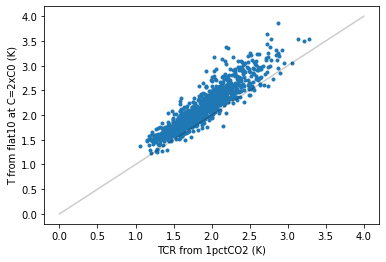

In [71]:
plt.plot(ds_fair['tcr'],tcr_flat10_fair,'.')
plt.xlabel('TCR from 1pctCO2 (K)')
plt.ylabel('T from flat10 at C=2xC0 (K)')
plt.plot([0,4],[0,4],'k-',alpha=0.2)


In [72]:
mdls=['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM']
expt=['esm-pictrl','1pctco2','flat10','flat10-zec','flat10-cdr']
flds=['tas','co2','nbp','fgco2']

In [73]:
import os

In [74]:
ed={}
for m in mdls:
    ed[m]={}
    for e in expt:
        tmpa=[]
        for f in flds:

                fl10='ESM_data/'+m+'/'+'flat10'+'_'+f+'_'+m+'.nc'
                fl='ESM_data/'+m+'/'+e+'_'+f+'_'+m+'.nc'
                if os.path.exists(fl) and os.path.exists(fl10):
                    otmp=xr.open_dataset(fl)
                    otmp10=xr.open_dataset(fl10)
                    if 'nep' in list(otmp.keys()):
                        otmp=otmp.rename_vars({"nep": "nbp"})
                    if 'nep' in list(otmp10.keys()):
                        otmp10=otmp10.rename_vars({"nep": "nbp"})
                    tmp=otmp.copy(deep=True)
                    tmp10=otmp10.copy(deep=True)
                    if e=='flat10':
                        if len(tmp.time)<1000:
                            tmp.coords['time']=pd.date_range('1700-01-01', periods=tmp['time'].values.shape[0],freq='Y')
                        else:
                            tmp.coords['time']=pd.date_range('1700-01-01', periods=tmp['time'].values.shape[0],freq='M')
                        tmp=tmp[f]    
                    else: 
                        if len(tmp.time)<1000:
                            tmp10.coords['time']=pd.date_range('1700-01-01', periods=tmp10['time'].values.shape[0],freq='Y')
                            tmp.coords['time']=pd.date_range('1800-01-01', periods=tmp['time'].values.shape[0],freq='Y')
                        else:
                            tmp10.coords['time']=pd.date_range('1700-01-01', periods=tmp10['time'].values.shape[0],freq='M')
                            tmp.coords['time']=pd.date_range('1800-01-01', periods=tmp['time'].values.shape[0],freq='M')
  
                        tmp=xr.concat((tmp10.where(tmp10['time.year'] < 1800, drop=True)[f],tmp[f]),'time')
                    tmp=tmp.groupby('time.year').mean()
                    if len(tmp.shape)==3:
                        tmp=tmp.sel(lat=0).sel(lon=0).drop('lat').drop('lon')
                    if len(tmp.shape)==4:
                        tmp=tmp.sel(lat=0).sel(lon=0).isel(lev=[0]).drop('lat').drop('lon').drop('lev')
                    tmpa.append(tmp)
                else:
                    print(m+e+f)
        
             
        ed[m][e]=xr.merge(tmpa)
        if len(tmpa)>0:
            ed[m][e]['fco2fos']=ed[m][e]['tas'].copy()
            if e=='flat10':
                    ed[m][e]['fco2fos'].values=extd(e_flat10['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if e=='flat10-cdr':
                    ed[m][e]['fco2fos'].values=extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if e=='flat10-zec':
                    ed[m][e]['fco2fos'].values=extd(e_flat10_zec['Emission Rate (PgC a-1)'],len(ed[m][e]['year']))
            if m=='ACCESS-ESM1-5':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6

            if m=='GFDL-ESM4':
                ed[m][e]['co2']=ed[m][e]['co2']*1e6
                ed[m][e]['nbp']=ed[m][e]['nbp']*5.1e14/1e12*3600*24*365
                aco2=np.diff(ed[m][e]['co2'][:,0],prepend=ed[m][e]['co2'][0])*2.12
                ed[m][e]['fgco2']=ed[m][e]['fco2fos']-aco2-ed[m][e]['nbp']              
            if m=='CESM2':
                ed[m][e]['fgco2']=ed[m][e]['fgco2']/1e15
                ed[m][e]['nbp']=ed[m][e]['nbp']/1e15
                
                ed[m][e]['co2']=280+np.cumsum(ed[m][e]['fco2fos']-ed[m][e]['fgco2']-ed[m][e]['nbp'])/2.12
            
                
                

ACCESS-ESM1-5esm-pictrltas
ACCESS-ESM1-5esm-pictrlco2
ACCESS-ESM1-5esm-pictrlnbp
ACCESS-ESM1-5esm-pictrlfgco2
ACCESS-ESM1-51pctco2tas
ACCESS-ESM1-51pctco2co2
ACCESS-ESM1-51pctco2nbp
ACCESS-ESM1-51pctco2fgco2


/home/sanderson/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/sanderson/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/home/sanderson/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/sanderson/anaco

CESM2esm-pictrltas
CESM2esm-pictrlco2
CESM2esm-pictrlnbp
CESM2esm-pictrlfgco2
CESM21pctco2tas
CESM21pctco2co2
CESM21pctco2nbp
CESM21pctco2fgco2
CESM2flat10co2
CESM2flat10-zecco2
CESM2flat10-cdrco2
GFDL-ESM4esm-pictrltas
GFDL-ESM4esm-pictrlco2
GFDL-ESM4esm-pictrlnbp
GFDL-ESM4esm-pictrlfgco2
GFDL-ESM41pctco2tas
GFDL-ESM41pctco2co2
GFDL-ESM41pctco2nbp
GFDL-ESM41pctco2fgco2
GFDL-ESM4flat10fgco2
GFDL-ESM4flat10-zecfgco2
GFDL-ESM4flat10-cdrfgco2
NorESM2-LM1pctco2tas
NorESM2-LM1pctco2co2
NorESM2-LM1pctco2nbp
NorESM2-LM1pctco2fgco2


ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM


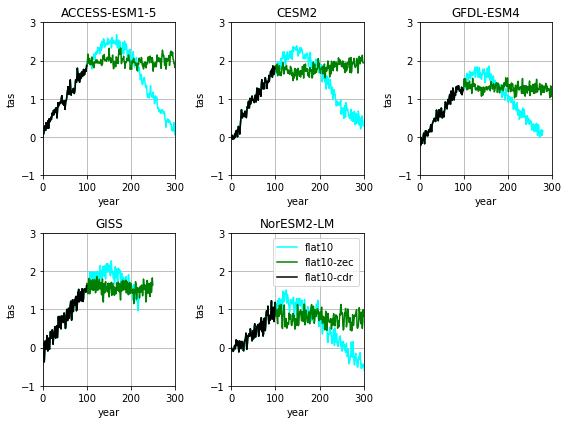

In [76]:
fig, axs = plt.subplots(2, 3,figsize=[8,6])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    try:
        (ed[m]['flat10-cdr']['tas']-ed[m]['flat10']['tas'][0]).plot(color='cyan',ax=axs[i],label='flat10')
    except:
        print('fail cdr')
    try:
        (ed[m]['flat10-zec']['tas']-ed[m]['flat10']['tas'][0]).plot(color='green',ax=axs[i],label='flat10-zec')
    except:
        print('fail zec')
    (ed[m]['flat10']['tas'][:100]-ed[m]['flat10']['tas'][0]).plot(color='k',ax=axs[i],label='flat10-cdr')

    axs[i].set_title(m)
    axs[i].set_ylim([-1,3])
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1900,2000])
    axs[i].set_xticklabels([0,100,200,300])
    axs[i].grid()
axs[5].set_axis_off()
plt.tight_layout()
axs[4].legend()
    


ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM


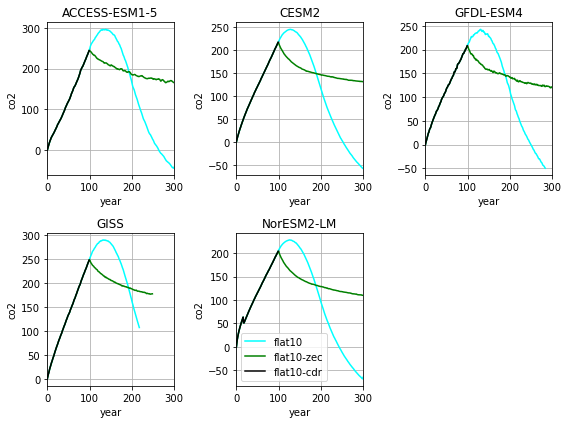

In [77]:
fig, axs = plt.subplots(2, 3,figsize=[8,6])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    try:
        (ed[m]['flat10-cdr']['co2']-ed[m]['flat10']['co2'][0]).plot(color='cyan',ax=axs[i],label='flat10')
    except:
        print('fail cdr')
    try:
        (ed[m]['flat10-zec']['co2']-ed[m]['flat10']['co2'][0]).plot(color='green',ax=axs[i],label='flat10-zec')
    except:
        print('fail zec')
    try:
        (ed[m]['flat10']['co2'][:100]-ed[m]['flat10']['co2'][0]).plot(color='k',ax=axs[i],label='flat10-cdr')
    except:
        print('fail flat')
        

    axs[i].set_title(m)
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1900,2000])
    axs[i].set_xticklabels([0,100,200,300])
    axs[i].grid()
axs[5].set_axis_off()
plt.tight_layout()
axs[4].legend()
    


ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM


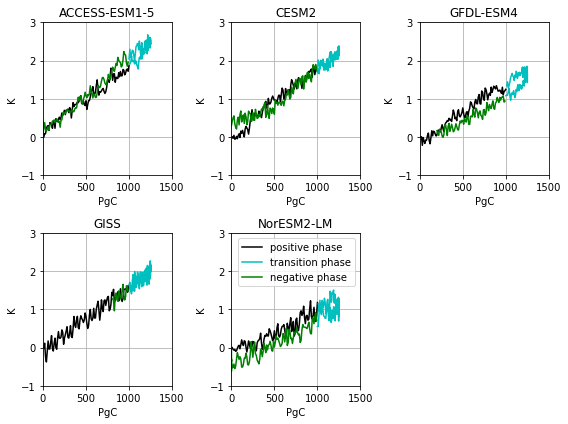

In [78]:
fig, axs = plt.subplots(2, 3,figsize=[8,6])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    tz=ed[m]['flat10']['tas'][0]
    cumem=np.cumsum(extd(e_flat10_cdr['Emission Rate (PgC a-1)'],len(ed[m]['flat10-cdr']['tas'])))
    axs[i].plot(cumem[:100],ed[m]['flat10-cdr']['tas'][:100]-tz,'k',label='positive phase')
    axs[i].plot(cumem[100:200],ed[m]['flat10-cdr']['tas'][100:200]-tz,'c',label='transition phase')
    axs[i].plot(cumem[200:],ed[m]['flat10-cdr']['tas'][200:]-tz,'g',label='negative phase')
    axs[i].set_title(m)
    axs[i].set_ylim([-1,3])
    axs[i].set_xlim([0,1500])
    axs[i].set_xlabel('PgC')
    axs[i].set_ylabel('K')
    
    axs[i].grid()
    

axs[5].set_axis_off()
plt.tight_layout()
axs[4].legend()



Text(0, 0.5, 'K')

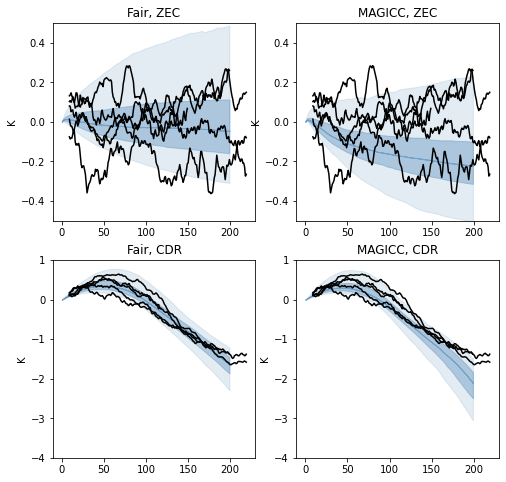

In [79]:
fig, axs = plt.subplots(2, 2,figsize=[8,8])
axs=axs.flatten()
plot_range(t_100pl-t_100,axs[0])
for i,m in enumerate(mdls):
    axs[0].plot(ed[m]['flat10-zec']['tas'][100:].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),'k')
axs[0].set_ylim([-.5,.5])
axs[0].set_ylabel('K')

axs[0].set_title('Fair, ZEC')

plot_range(m_100pl-m_100,axs[1])
for i,m in enumerate(mdls):
    axs[1].plot(ed[m]['flat10-zec']['tas'][100:].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),'k')
    axs[1].set_ylim([-.5,.5])
axs[1].set_title('MAGICC, ZEC')
axs[1].set_ylabel('K')

plot_range(ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300))-t_100,axs[2])
for i,m in enumerate(mdls):
    axs[2].plot(ed[m]['flat10-cdr']['tas'][100:].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),'k')
axs[2].set_ylim([-4,1])
axs[2].set_title('Fair, CDR')
axs[2].set_ylabel('K')

plot_range(ds_magicc.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-m_100,axs[3])
for i,m in enumerate(mdls):
    axs[3].plot(ed[m]['flat10-cdr']['tas'][100:].rolling(year=10).mean()-ed[m]['flat10']['tas'][90:110].mean(),'k')
    axs[3].set_ylim([-4,1])
axs[3].set_title('MAGICC, CDR')
axs[3].set_ylabel('K')

    

In [80]:
ds_fair.temperature.sel(scenario='esm-flat10_cdr').isel(time=slice(100,300)).T-t_100

<xarray.DataArray 'temperature' (config: 1001, time: 200)>
array([[ 0.        ,  0.01510552,  0.03003313, ..., -2.36343658,
        -2.38397004, -2.40450169],
       [ 0.        ,  0.00979137,  0.01943004, ..., -1.33710504,
        -1.34857415, -1.36000596],
       [ 0.        ,  0.02761674,  0.05510551, ..., -1.94110956,
        -1.97392186, -2.00682065],
       ...,
       [ 0.        ,  0.02013002,  0.04008136, ..., -1.92009262,
        -1.94028455, -1.96049177],
       [ 0.        ,  0.0141057 ,  0.02798275, ..., -1.81867118,
        -1.83468702, -1.85066602],
       [ 0.        ,  0.02190703,  0.04367685, ..., -2.34765815,
        -2.37375573, -2.39984786]])
Coordinates:
  * config   (config) int32 1230 1715 2658 3898 ... 1497041 1497105 1498424
  * time     (time) int32 100 101 102 103 104 105 ... 294 295 296 297 298 299

ACCESS-ESM1-5


AttributeError: 'collections.OrderedDict' object has no attribute 'right'

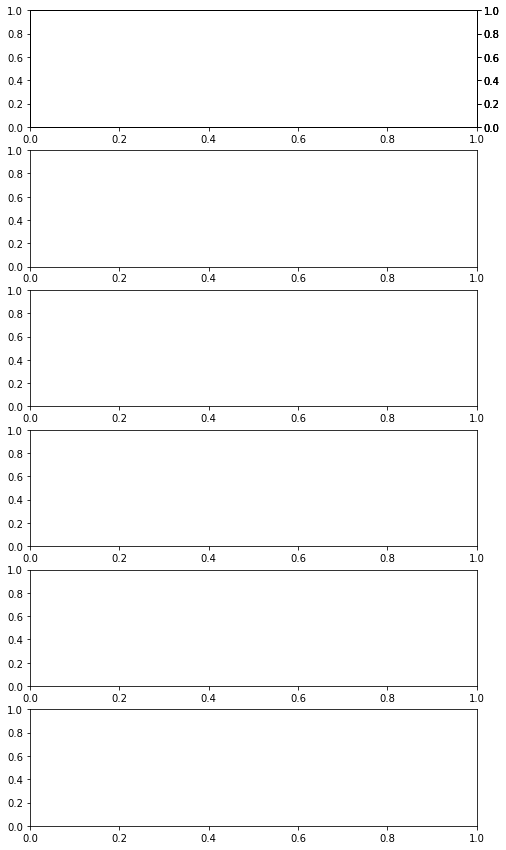

In [186]:
fig, axs = plt.subplots(6, 1,figsize=[8,15])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    twin1 = axs[i].twinx()
    twin2 = axs[i].twinx()
    twin3 = axs[i].twinx()
    
    twin2.spines.right.set_position(("axes", 1.1))
    twin3.spines.right.set_position(("axes", 1.2))
    
    axs[i].plot(np.arange(1700,2020),e_flat10_cdr['Emission Rate (PgC a-1)'],'k')

    try:
        (ed[m]['flat10-cdr']['tas']-ed[m]['flat10']['tas'][0]).plot(color='red',ax=twin1,label='flat10')
    except:
        print('fail cdr')
    
    try:
        (ed[m]['flat10-cdr']['fgco2']).rolling(year=10).mean().plot(color='blue',ax=twin2,label='flat10')

    except:
        print(0)
    try:
        
        (ed[m]['flat10-cdr']['nbp']).rolling(year=10).mean().plot(color='green',ax=twin3,label='flat10')

    except:
        print(0)        
    twin1.set_title('')
    twin2.set_title('')
    twin3.set_title('')
    
    twin1.set_ylim([-3,3])
    twin2.set_ylim([-10,10])
    twin3.set_ylim([-10,10])
    axs[i].set_ylabel('Emissions (PgC/yr)')
    twin1.set_ylabel('Temperature (K)')
    twin2.set_ylabel('Ocean C flux (PgC/yr)')
    twin3.set_ylabel('Land C flux (PgC/yr)')    
    twin1.tick_params(axis='y', colors='red')
    twin1.yaxis.label.set_color('red')
    twin2.tick_params(axis='y', colors='blue')
    twin2.yaxis.label.set_color('blue')
    twin3.tick_params(axis='y', colors='green')
    twin3.yaxis.label.set_color('green')        
    axs[i].set_title(m)
    axs[i].set_ylim([-12,12])
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1850,1900,2000])
    axs[i].set_xticklabels([0,100,150,200,300])
    axs[i].grid()
axs[5].set_axis_off()
plt.tight_layout()
axs[4].legend()



ACCESS-ESM1-5
CESM2
GFDL-ESM4
GISS
NorESM2-LM


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


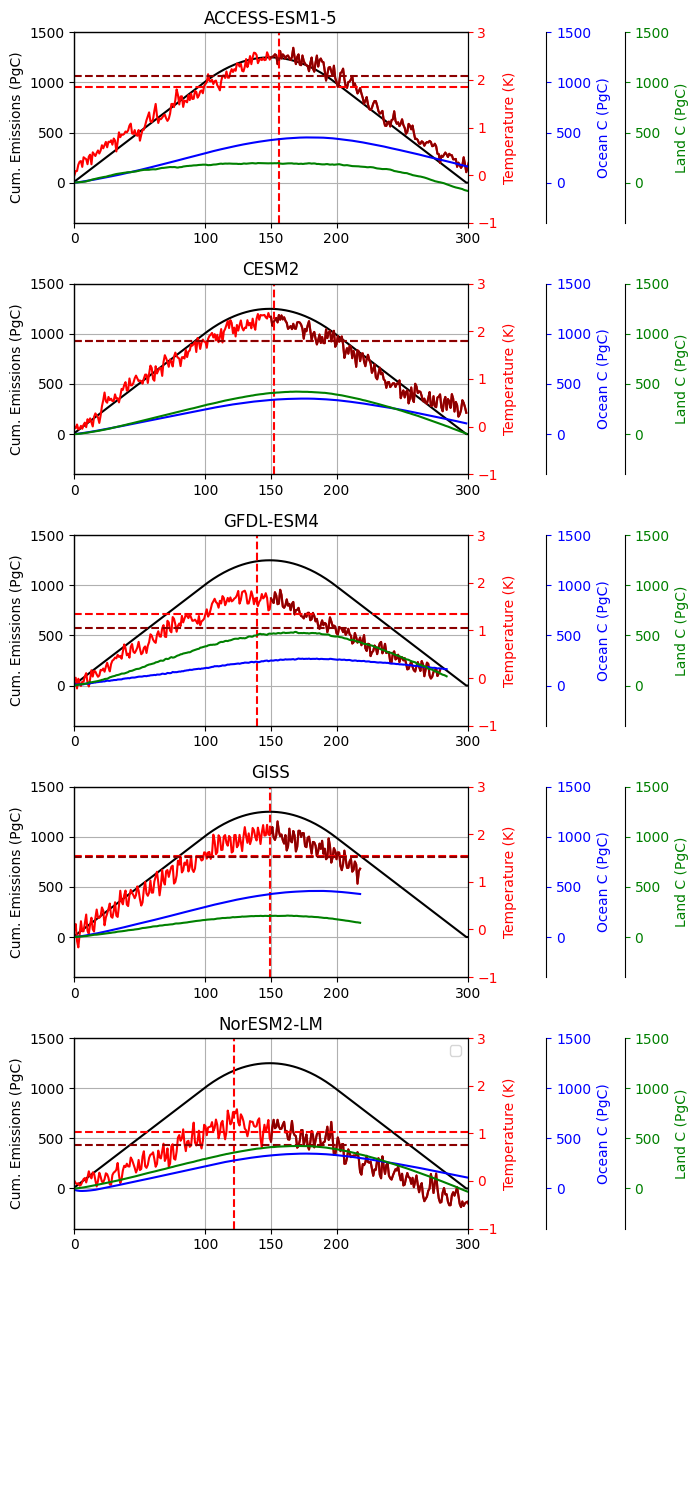

In [ ]:
fig, axs = plt.subplots(6, 1,figsize=[8,15])
axs=axs.flatten()
for i,m in enumerate(mdls):
    print(m)
    twin1 = axs[i].twinx()
    twin2 = axs[i].twinx()
    twin3 = axs[i].twinx()
    
    twin2.spines.right.set_position(("axes", 1.2))
    twin3.spines.right.set_position(("axes", 1.4))
    
    axs[i].plot(np.arange(1700,2020),np.cumsum(e_flat10_cdr['Emission Rate (PgC a-1)']),'k')

    try:
        (ed[m]['flat10-cdr']['tas']-ed[m]['flat10']['tas'][0]).plot(color='red',ax=twin1,label='flat10')
        (ed[m]['flat10-cdr']['tas'][150:]-ed[m]['flat10']['tas'][0]).plot(color='darkred',ax=twin1,label='flat10')
        
        mxy=ed[m]['flat10-cdr']['tas'].rolling(year=40, center=True).mean().idxmax()
        t100=ed[m]['flat10-cdr']['tas'][90:110].mean()
        t200=ed[m]['flat10-cdr']['tas'][190:210].mean()
        
        twin1.axvline(mxy,color='r',linestyle='--')
        twin1.axhline(t100-ed[m]['flat10']['tas'][0],color='r',linestyle='--')
        twin1.axhline(t200-ed[m]['flat10']['tas'][0],color='darkred',linestyle='--')
        
    except:
        print('fail cdr')
    
    try:
        (ed[m]['flat10-cdr']['fgco2']).cumsum().plot(color='blue',ax=twin2,label='flat10')

    except:
        print(0)
    try:
        
        (ed[m]['flat10-cdr']['nbp']).cumsum().plot(color='green',ax=twin3,label='flat10')

    except:
        print(0)        
    twin1.set_title('')
    twin2.set_title('')
    twin3.set_title('')
    
    twin1.set_ylim([-1,3])
    twin2.set_ylim([-400,1500])
    twin3.set_ylim([-400,1500])
    axs[i].set_ylabel('Cum. Emissions (PgC)')
    twin1.set_ylabel('Temperature (K)')
    twin2.set_ylabel('Ocean C (PgC)')
    twin3.set_ylabel('Land C (PgC)')    
    twin1.tick_params(axis='y', colors='red')
    twin1.yaxis.label.set_color('red')
    twin2.tick_params(axis='y', colors='blue')
    twin2.yaxis.label.set_color('blue')
    twin3.tick_params(axis='y', colors='green')
    twin3.yaxis.label.set_color('green')        
    axs[i].set_title(m)
    axs[i].set_ylim([-400,1500])
    axs[i].set_xlim([1700,2000])
    axs[i].set_xticks([1700,1800,1850,1900,2000])
    axs[i].set_xticklabels([0,100,150,200,300])
    axs[i].grid()
axs[5].set_axis_off()
plt.tight_layout()
axs[4].legend()




In [ ]:
import scipy
from scipy import signal

In [187]:
agtp_simp=np.zeros([1000,len(mdls)])
agtp_corr=np.zeros([1000,len(mdls)])
agtp_corr2=np.zeros([1000,len(mdls)])

for i,m in enumerate(mdls):

    tc_tst=(ed[m]['flat10'].tas[90:110]-ed[m]['flat10-cdr'].tas[0]).mean()
    zec50_tst=ed[m]['flat10-zec'].tas[140:160].mean()-ed[m]['flat10'].tas[90:110].mean()
    zec100_tst=ed[m]['flat10-zec'].tas[190:210].mean()-ed[m]['flat10'].tas[90:110].mean()
    tc_corr2=(tc_tst-zec100_tst/2)/np.sum(ed[m]['flat10'].fco2fos[:100])
    tc_corr=(tc_tst-zec50_tst)/np.sum(ed[m]['flat10'].fco2fos[:100])
    tc_simp=(tc_tst)/np.sum(ed[m]['flat10'].fco2fos[:100])
    agtp_simp[:,i]=tc_simp.values*np.ones(1000)
    agtp_corr[:,i]=tc_corr.values*np.ones(1000)+np.arange(0,1000)*zec50_tst.values/50/1000
    agtp_corr2[:,i]=tc_corr2.values*np.ones(1000)+np.arange(0,1000)*zec100_tst.values/100/1000




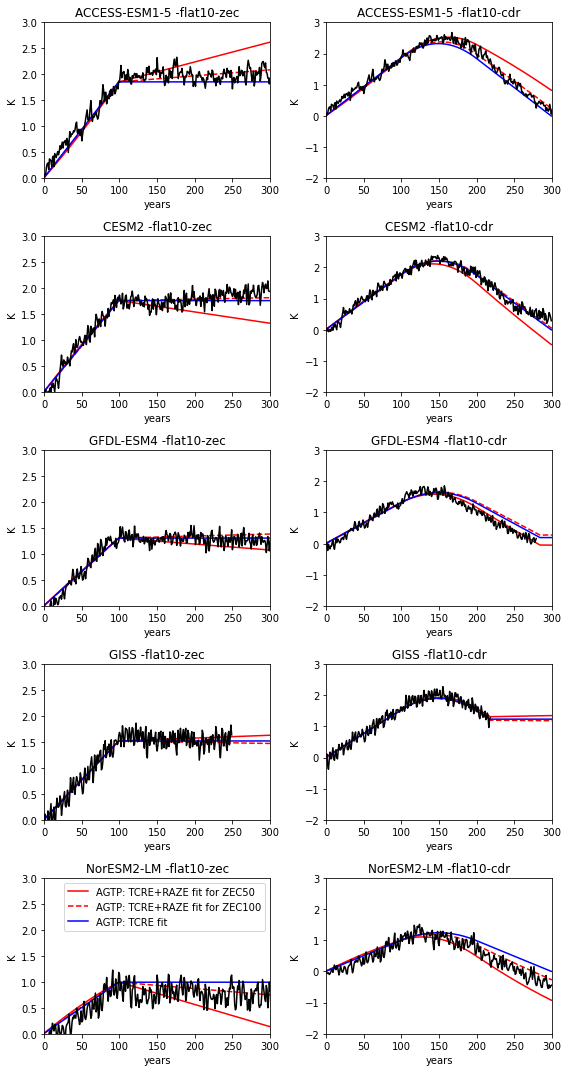

In [223]:

fig, axs = plt.subplots(5, 2,figsize=[8,15])
for i,m in enumerate(mdls):

    p1=axs[i,0].plot(signal.convolve(agtp_corr[:,i],ed[m]['flat10-cdr'].fco2fos[:100]),'r')
    p2=axs[i,0].plot(signal.convolve(agtp_corr2[:,i],ed[m]['flat10-cdr'].fco2fos[:100]),'r--')
    p3=axs[i,0].plot(signal.convolve(agtp_simp[:,i],ed[m]['flat10-cdr'].fco2fos[:100]),'b')

    axs[i,0].plot(ed[m]['flat10-zec'].tas-ed[m]['flat10-cdr'].tas[0],'k')
    axs[i,0].set_xlim(0,300)
    axs[i,0].set_ylim(0,3)
    
    axs[i,0].set_xlabel('years')
    axs[i,0].set_ylabel('K')
    axs[i,0].set_title(m+' -flat10-zec')
    
    axs[i,1].plot(signal.convolve(agtp_corr[:,i],ed[m]['flat10-cdr'].fco2fos[:]),'r')
    axs[i,1].plot(signal.convolve(agtp_corr2[:,i],ed[m]['flat10-cdr'].fco2fos[:]),'r--')
    axs[i,1].plot(signal.convolve(agtp_simp[:,i],ed[m]['flat10-cdr'].fco2fos[:]),'b')

    axs[i,1].plot(ed[m]['flat10-cdr'].tas-ed[m]['flat10-cdr'].tas[0],'k')
    axs[i,1].set_xlim(0,300)
    axs[i,1].set_ylim(-2,3)
    
    axs[i,1].set_xlabel('years')
    axs[i,1].set_ylabel('K')
    axs[i,1].set_title(m+' -flat10-cdr')
    
axs[4,0].legend([p1[0],p2[0],p3[0]],['AGTP: TCRE+RAZE fit for ZEC50','AGTP: TCRE+RAZE fit for ZEC100','AGTP: TCRE fit',])

plt.tight_layout()

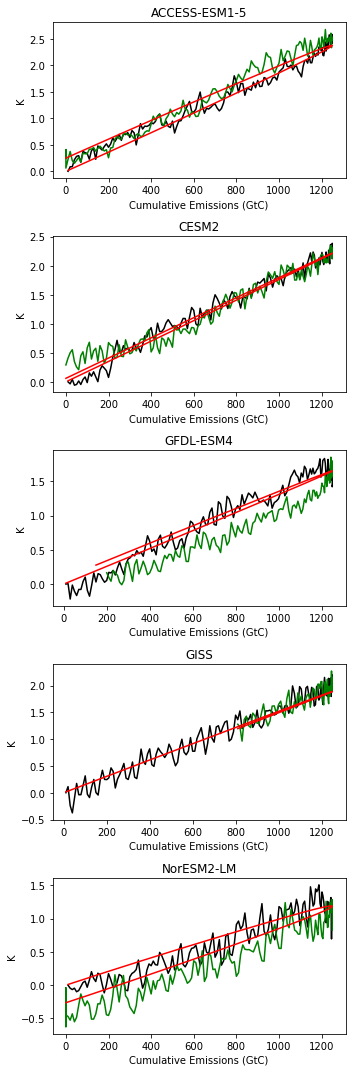

In [220]:
fig, axs = plt.subplots(5, 1,figsize=[5,15])
for i,m in enumerate(mdls):
    l=len(np.cumsum(ed[m]['flat10-cdr'].fco2fos[:]))
    axs[i].plot(np.cumsum(ed[m]['flat10-cdr'].fco2fos[:150]),ed[m]['flat10-cdr'].tas[:150]-ed[m]['flat10-cdr'].tas[0],'k')
    axs[i].plot(np.cumsum(ed[m]['flat10-cdr'].fco2fos)[150:],ed[m]['flat10-cdr'].tas[150:]-ed[m]['flat10-cdr'].tas[0],'g')
    
    #axs[i].plot(np.cumsum(ed[m]['flat10-cdr'].fco2fos[:]),signal.convolve(agtp_corr[:,i],ed[m]['flat10-cdr'].fco2fos[:])[:l],'r--')
    axs[i].plot(np.cumsum(ed[m]['flat10-cdr'].fco2fos[:]),signal.convolve(agtp_corr2[:,i],ed[m]['flat10-cdr'].fco2fos[:])[:l],'r-')
    #axs[i].plot(np.cumsum(ed[m]['flat10-cdr'].fco2fos[:]),signal.convolve(agtp_simp[:,i],ed[m]['flat10-cdr'].fco2fos[:])[:l],'b-')
    axs[i].set_xlabel('Cumulative Emissions (GtC)')
    axs[i].set_ylabel('K')
    axs[i].set_title(m)
plt.tight_layout()

Text(0, 0.5, 'warming per EgC')

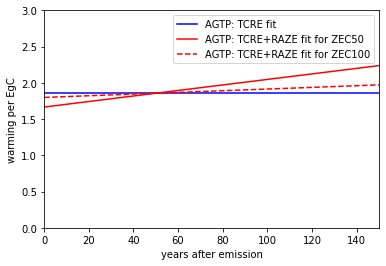

In [184]:
p1=plt.plot(agtp_simp*1000,'b')
p2=plt.plot(agtp_corr*1000,'r')
p3=plt.plot(agtp_corr2*1000,'r--')

plt.ylim(0,3)
plt.xlim(0,150)
plt.legend([p1[0],p2[0],p3[0]],['AGTP: TCRE fit','AGTP: TCRE+RAZE fit for ZEC50','AGTP: TCRE+RAZE fit for ZEC100'])
plt.xlabel('years after emission')
plt.ylabel('warming per EgC')

In [221]:
filt=signal.deconvolve(ed[m]['flat10-zec'].tas-ed[m]['flat10-cdr'].tas[0], ed[m]['flat10-cdr'].fco2fos[:100])[0]


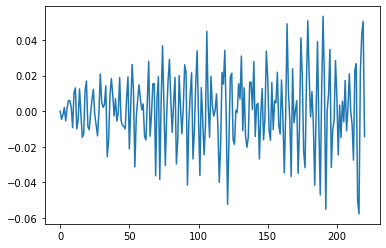

In [222]:
plt.plot(filt)

In [285]:
def tfun(x,t):
  out=x[0]*t*np.exp(-t/x[1])+x[2]+t*x[3]
  return out

(0.0, 2.0)

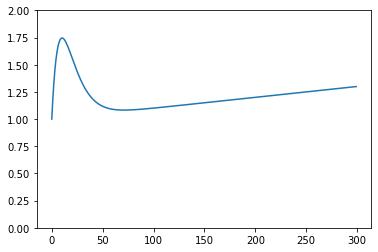

In [363]:
def implsfun(x,trg,e):
  impls=signal.convolve(tfun(x[:],np.arange(0,len(trg)))/100,e)
  
  return impls

In [364]:
def residfun(x,trg,e):
  impls=implsfun(x,trg,e)
  out=np.sum((impls[:len(trg)]-trg)**2)
  
  return out

In [388]:
opt=[]
for i,m in enumerate(mdls):
    tsamp=ed[m]['flat10-cdr'].tas.values-ed[m]['flat10-cdr'].tas[0].values
    Ecn0=ed[m]['flat10-cdr'].fco2fos[:len(tsamp)].values
    opt.append(scipy.optimize.minimize(lambda x: residfun(x,tsamp,Ecn0), [1.30653195e-02, 2.96387774e+01, 2.54539140e-02, 4.99515589e-04]))

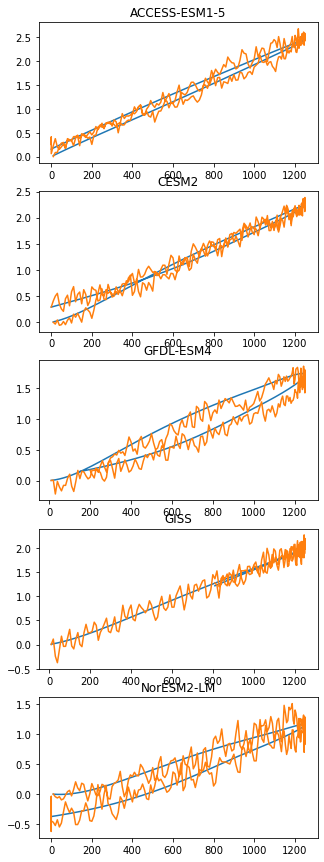

In [389]:
fig, axs = plt.subplots(5, 1,figsize=[5,15])
for i,m in enumerate(mdls):
    tsamp=ed[m]['flat10-cdr'].tas.values-ed[m]['flat10-cdr'].tas[0].values

    Ecn0=ed[m]['flat10-cdr'].fco2fos[:len(tsamp)].values
    l=len(np.cumsum(Ecn0))
    axs[i].plot(np.cumsum(Ecn0),implsfun(opt[i].x,tsamp,Ecn0)[:l])
    axs[i].plot(np.cumsum(Ecn0),ed[m]['flat10-cdr'].tas.values-ed[m]['flat10-cdr'].tas[0].values)
    
    axs[i].set_title(m)

In [368]:
opt[1].x


array([1.00653195e-02, 2.96387774e+01, 8.24539140e-02, 4.99515589e-04])

(-2.0, 2.0)

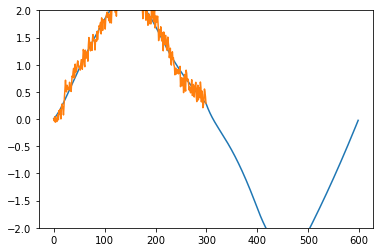

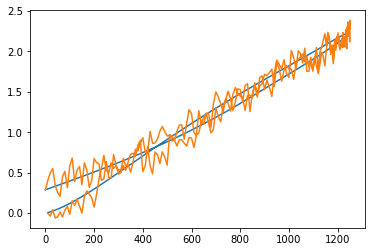